In [178]:
import pandas as pd
import random
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sn
import matplotlib.pyplot as pl
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [132]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/data/recipes.csv")

print("Data read into dataframe!")

Data read into dataframe!


In [133]:
print("Size of the data = ",df.shape)
df.head()

Size of the data =  (57691, 384)


,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [134]:
print("Cuisines Available")
sorted(df.country.unique())

Cuisines Available


['African',
 'American',
 'Asian',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Cajun_Creole',
 'Canada',
 'Caribbean',
 'Central_SouthAmerican',
 'China',
 'Chinese',
 'East-African',
 'Eastern-Europe',
 'EasternEuropean_Russian',
 'English_Scottish',
 'France',
 'French',
 'German',
 'Germany',
 'Greek',
 'India',
 'Indian',
 'Indonesia',
 'Iran',
 'Irish',
 'Israel',
 'Italian',
 'Italy',
 'Japan',
 'Japanese',
 'Jewish',
 'Korea',
 'Lebanon',
 'Malaysia',
 'Mediterranean',
 'Mexican',
 'Mexico',
 'MiddleEastern',
 'Moroccan',
 'Netherlands',
 'North-African',
 'Pakistan',
 'Philippines',
 'Portugal',
 'Scandinavia',
 'Scandinavian',
 'South-African',
 'South-America',
 'Southern_SoulFood',
 'Southwestern',
 'Spain',
 'Spanish_Portuguese',
 'Switzerland',
 'Thai',
 'Thailand',
 'Turkey',
 'UK-and-Ireland',
 'Vietnam',
 'Vietnamese',
 'West-African',
 'asian',
 'chinese',
 'east_asian',
 'italian',
 'japanese',
 'korean',
 'mexico',
 'western']

### We can see some of the country names are repeated with spelling variations. Let's make it one
<ul><li>France : French</li>
<li>China : Chinese : chinese</li>
<li>Eastern-Europe : EasternEuropean_Russian</li>
<li>German : Germany</li>
<li>India : Indian</li>
<li>Italian : Italy</li>
<li>Japanese : Japan : japanese</li>
<li>Mexican : Mexico : mexico</li>
<li>Scandinavia : Scandinavian</li>
<li>Spain : Spanish_Portuguese</li>
<li>Thailand : Thai</li>
<li>Vietnamese : Vietnam</li></ul>

In [135]:
df.loc[df["country"] == "French", "country"] = "France"
df.loc[df["country"] == "Chinese", "country"] = "China"
df.loc[df["country"] == "chinese", "country"] = "China"
df.loc[df["country"] == "EasternEuropean_Russian", "country"] = "Eastern-Europe"
df.loc[df["country"] == "German", "country"] = "Germany"
df.loc[df["country"] == "Indian", "country"] = "India"
df.loc[df["country"] == "Italian", "country"] = "Italy"
df.loc[df["country"] == "japanese", "country"] = "Japan"
df.loc[df["country"] == "Japanese", "country"] = "Japan"
df.loc[df["country"] == "mexico", "country"] = "Mexico"
df.loc[df["country"] == "Mexican", "country"] = "Mexico"
df.loc[df["country"] == "Spanish_Portuguese", "country"] = "Spain"
df.loc[df["country"] == "Thai", "country"] = "Thailand"
df.loc[df["country"] == "Vietnam", "country"] = "Vietnamese"

In [136]:
print("Cuisines Available")
sorted(df.country.unique())

Cuisines Available


['African',
 'American',
 'Asian',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Cajun_Creole',
 'Canada',
 'Caribbean',
 'Central_SouthAmerican',
 'China',
 'East-African',
 'Eastern-Europe',
 'English_Scottish',
 'France',
 'Germany',
 'Greek',
 'India',
 'Indonesia',
 'Iran',
 'Irish',
 'Israel',
 'Italy',
 'Japan',
 'Jewish',
 'Korea',
 'Lebanon',
 'Malaysia',
 'Mediterranean',
 'Mexico',
 'MiddleEastern',
 'Moroccan',
 'Netherlands',
 'North-African',
 'Pakistan',
 'Philippines',
 'Portugal',
 'Scandinavia',
 'Scandinavian',
 'South-African',
 'South-America',
 'Southern_SoulFood',
 'Southwestern',
 'Spain',
 'Switzerland',
 'Thailand',
 'Turkey',
 'UK-and-Ireland',
 'Vietnamese',
 'West-African',
 'asian',
 'east_asian',
 'italian',
 'korean',
 'western']

### Let's now check how much biased the data is

In [137]:
df["country"].value_counts()

American                 40150
Italy                     3176
Mexico                    2390
France                    1264
Asian                     1176
east_asian                 951
Canada                     774
korean                     767
India                      598
western                    450
China                      442
Eastern-Europe             381
Spain                      366
Southern_SoulFood          346
Japan                      320
Jewish                     320
Germany                    289
Thailand                   289
Mediterranean              289
UK-and-Ireland             282
MiddleEastern              248
Central_SouthAmerican      241
Greek                      225
English_Scottish           204
Caribbean                  183
Scandinavia                158
Cajun_Creole               146
Moroccan                   137
African                    115
Southwestern               108
South-America              103
Vietnamese                  95
Scandina

### Looks like the data is not that neat.  so let's take a subset of data which is unbiased 

In [138]:
df_2= df
y=df.groupby("country")["country"].transform(len)
mask = (y < 600) & (y > 250)
df=df[mask]
df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,India,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
66,India,Yes,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
67,India,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
68,India,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
69,India,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,No


In [100]:
# replace all the yes and no to 1 and 0
df = df.replace(to_replace="Yes", value=1)
df = df.replace(to_replace="No", value=0)
df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,India,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Data Ready

### split testing data
take 30 samples from each country 

In [102]:
n=30
random.seed(1234)

df_test = df.groupby("country",group_keys=False).apply(lambda x: x.sample(n))

df_test_x = df_test.iloc[:,1:]
df_test_y = df_test["country"]

In [103]:
df_test["country"].value_counts()

Japan                30
Jewish               30
India                30
Thailand             30
Southern_SoulFood    30
western              30
Mediterranean        30
Spain                30
Eastern-Europe       30
Germany              30
China                30
UK-and-Ireland       30
Name: country, dtype: int64

### Let's take rest of the data as training set

In [104]:
df_train = df.drop(df_test.index)

df_train_x = df_train.iloc[:,1:]
df_train_y = df_train["country"]

### Creating a decision tree model and training it

In [105]:
classifier = tree.DecisionTreeClassifier(max_depth=15)
classifier.fit(df_train_x,df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Test the model with testdata and compare the results

In [106]:
df_predict = classifier.predict(df_test_x)

In [107]:
confusion_matrix= pd.crosstab(df_test_y,df_predict,rownames=['Actual'], colnames=['Predicted'])

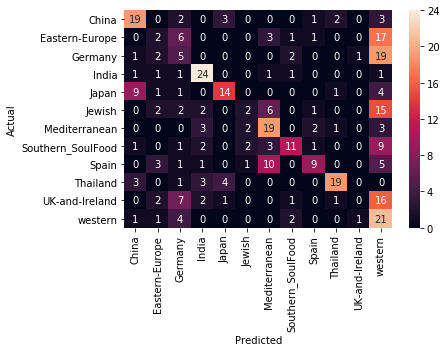

In [108]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

At this point I realised the data is really biased even after taking that subset. Most of the western countries with almost similar cuisines are mentioned in different names making the model inefficient. In the reference project they have used only 5 countries ( Now I understood why they did that :D) so Lemme make this that way, taking only 5 asian countries. I went back to my previous cells and made a copy of df as df_2 before making the subset 

In [140]:
# replace all the yes and no to 1 and 0
df_2 = df_2.replace(to_replace="Yes", value=1)
df_2 = df_2.replace(to_replace="No", value=0)
df_2.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df_2["country"].value_counts()

American                 40150
Italy                     3176
Mexico                    2390
France                    1264
Asian                     1176
east_asian                 951
Canada                     774
korean                     767
India                      598
western                    450
China                      442
Eastern-Europe             381
Spain                      366
Southern_SoulFood          346
Japan                      320
Jewish                     320
Germany                    289
Thailand                   289
Mediterranean              289
UK-and-Ireland             282
MiddleEastern              248
Central_SouthAmerican      241
Greek                      225
English_Scottish           204
Caribbean                  183
Scandinavia                158
Cajun_Creole               146
Moroccan                   137
African                    115
Southwestern               108
South-America              103
Vietnamese                  95
Scandina

I'm actually focusing on 5 countries hoping there won't be further confusion in their cuisines
<ol>
<li>Korea</li>
<li>Japan</li>
<li>China</li>
<li>India</li>
<li>Thai</li>
</ol>

In [142]:
df_2=df_2[df_2.country.isin(["korean","India","China","Japan","Thailand"])]
print(df_2.shape)
print(df_2["country"].value_counts())
df_2.head()

 

(2416, 384)
korean      767
India       598
China       442
Japan       320
Thailand    289
Name: country, dtype: int64


,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,India,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Right now I'm making the entire process as a single function to call it multiple times. so that we can tune the depth and take averages for the final result

In [172]:
def Process_data(data,d):
    #take 30 random 
    n=30
    random.seed(1234)
    test = data.groupby("country",group_keys=False).apply(lambda x: x.sample(n))
    test_x = test.iloc[:,1:]
    test_y = test["country"]
    # set up train data
    train = data.drop(test.index)
    train_x = train.iloc[:,1:]
    train_y = train["country"]
    # let's train our decisin tree
    classifier = tree.DecisionTreeClassifier(max_depth=d)
    classifier.fit(train_x,train_y)
    predict = classifier.predict(test_x)
    confusion_matrix= pd.crosstab(test_y,predict,rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix= (confusion_matrix*100)/30 # taking average
    return confusion_matrix

Now let's try with different depths from 5-25 to see which perform better

In [173]:
res1=Process_data(df_2,5)
res2=Process_data(df_2,10)
res3=Process_data(df_2,15)
res4=Process_data(df_2,20)
res5=Process_data(df_2,25)

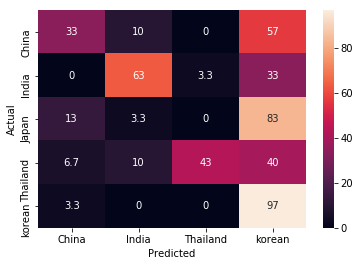

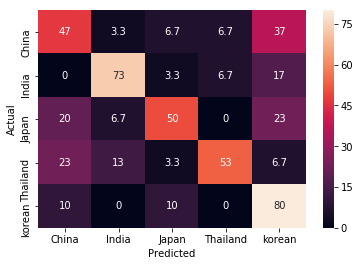

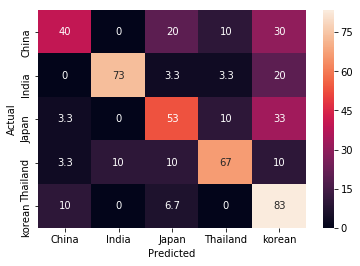

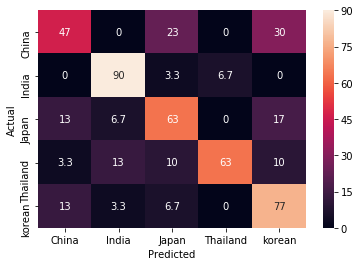

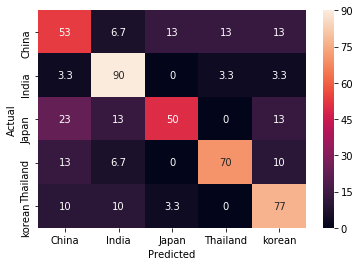

In [174]:
sn.heatmap(res1, annot=True)
plt.show()
sn.heatmap(res2, annot=True)
plt.show()
sn.heatmap(res3, annot=True)
plt.show()
sn.heatmap(res4, annot=True)
plt.show()
sn.heatmap(res5, annot=True)
plt.show()

### Observations

<ul>
    <li> The 5 depth one is not at all effective. it didn't identify a single japanees recipe</li>
    <li> From 15,20,25 We don't have any major changes for most of the reciepes</li>
    <li> As the depth goes high Japanees recipes are predicted better</li>
    <li> When depth is 25 the Chinese recipes predictions are getting worse</li>
    <li> Looks like depth 20 is performing optimum for the current situation</li>
</ul>

### Now let's take Multiple readings using depth 20 and take the average value as performance

In [176]:
opt1=Process_data(df_2,20)
opt2=Process_data(df_2,20)
opt3=Process_data(df_2,20)
opt4=Process_data(df_2,20)
opt5=Process_data(df_2,20)

final = (opt1+opt2+opt3+opt4+opt5)/5

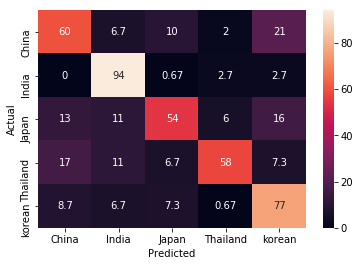

In [177]:
sn.heatmap(final, annot=True)

## Final Observation

<ol>
    <li>The model is good at predicting Indian cuisines</li>
    <li>Japanees cuisines are detected with 54% accuracy where the rest of them are got confused with all other cuisines with almost similar percentage</li>
    <li>21% of chinese cuisines are misidentified as Korean</li>
    <li>No Indian dish identified as chinese, similar accuracy found in Indian in Japanees and Korean in Thai</li>
</ol>